In [31]:
import numpy as np
import matplotlib.pyplot as plt
from jax import config
config.update("jax_enable_x64", True)
from jax import grad, jit, vmap
import jax.numpy as jnp
from gwb.omega_gw_jax import OmegaGWjax

In [32]:
kmin, kmax = 5e-5, 1e-2
k_arr = jnp.logspace(np.log10(kmin), np.log10(kmax), 50)

fac = 10
p_arr = jnp.geomspace(kmin/fac,kmax*fac,100)

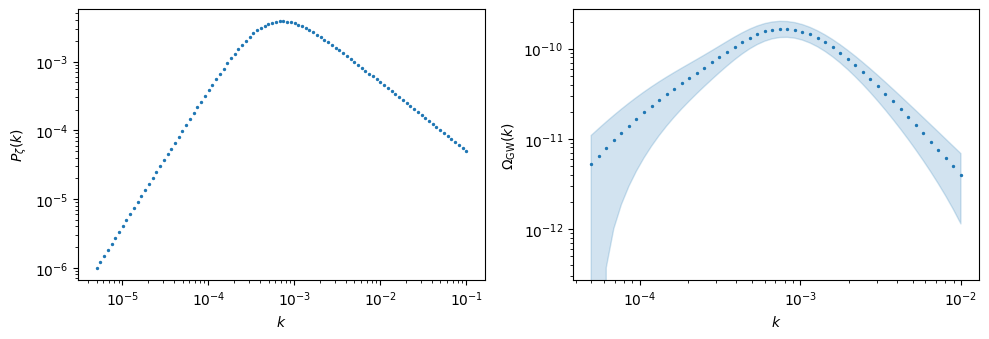

In [33]:
# bpl

f = k_arr #jnp.geomspace(5e-5, 1e-2, ksize)  # The frequencies to calculate Omega_GW
s = jnp.linspace(0, 1,20)  # First rescaled internal momentum
t = jnp.logspace(-5,5, 1000)  # Second rescaled internal momentum

## Expand t to add a new axis
t_expanded = jnp.expand_dims(t, axis=-1)
## Repeat t along the new axis to match the shape (100, 1000)
t = jnp.repeat(t_expanded, len(f), axis=-1)

@jit
def pz(p,pstar=5e-4,n1=2,n2=-1,sigma=2):
    nir = n1
    pl1 = (p/pstar)**nir
    nuv = (n2 - n1)/sigma
    pl2 = (1+(p/pstar)**sigma)**nuv
    # osc = (1 + 16.4*jnp.cos(1.4*jnp.log(p/1.))**2)
    return 1e-2 * pl1 * pl2 #*osc

gwb_calculator =  OmegaGWjax(s, t, f=f, kernel="RD", upsample=False)


pz_amp = pz(p_arr)
gwb_amp = gwb_calculator(pz,f)
kstar = 1e-3
omks_sigma = gwb_amp*( 0.05*(np.log(k_arr/kstar))**2 + 0.1) # 2% error at kstar + more towards edges
gwb_cov = jnp.diag(omks_sigma**2)

np.savez("bpl_data.npz", k=k_arr, gw=gwb_amp, cov=gwb_cov, p_arr=p_arr, pz_amp=pz_amp)


fig,(ax1,ax2) = plt.subplots(1,2,figsize=(10,3.5))
ax1.scatter(p_arr,pz_amp,s=2)
ax1.set_ylabel(r'$P_{\zeta}(k)$')
ax2.set_ylabel(r'$\Omega_{\mathrm{GW}}(k)$')
ax2.scatter(f,gwb_amp,s=2)
ax2.fill_between(k_arr,gwb_amp+1.96*omks_sigma,gwb_amp-1.96*omks_sigma,alpha=0.2,color='C0')
for ax in [ax1,ax2]:
    ax.set(yscale='log',xscale='log',xlabel=r'$k$')
fig.tight_layout();

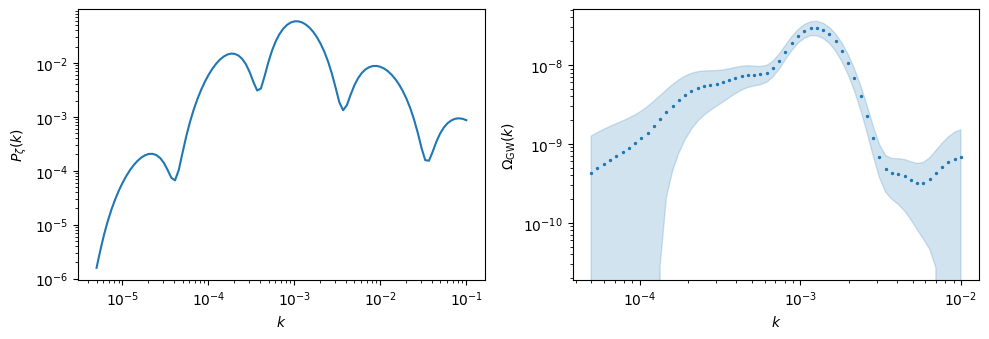

In [34]:
# osc

k_arr = jnp.logspace(np.log10(kmin), np.log10(kmax), 60)

f = k_arr #jnp.geomspace(5e-5, 1e-2, ksize)  # The frequencies to calculate Omega_GW
s = jnp.linspace(0, 1, 20)  # First rescaled internal momentum
t = jnp.logspace(-5,5, 1000)  # Second rescaled internal momentum

## Expand t to add a new axis
t_expanded = jnp.expand_dims(t, axis=-1)
## Repeat t along the new axis to match the shape (100, 1000)
t = jnp.repeat(t_expanded, len(f), axis=-1)

@jit
def pz(p,pstar=5e-4,n1=2,n2=-1,sigma=2):
    nir = n1
    pl1 = (p/pstar)**nir
    nuv = (n2 - n1)/sigma
    pl2 = (1+(p/pstar)**sigma)**nuv
    osc = (1 + 16.4*jnp.cos(1.4*jnp.log(p/1.))**2)
    return 1e-2*pl1 * pl2 *osc

gwb_calculator =  OmegaGWjax(s, t, f=f, kernel="RD", upsample=False)


pz_amp = pz(p_arr)
gwb_amp = gwb_calculator(pz,f)
kstar = 1e-3
omks_sigma = gwb_amp*( 0.1*(np.log(k_arr/kstar))**2 + 0.1) # 2% error at kstar + more towards edges
gwb_cov = jnp.diag(omks_sigma**2)

np.savez("osc_data.npz", k=k_arr, gw=gwb_amp, cov=gwb_cov, p_arr=p_arr, pz_amp=pz_amp)


fig,(ax1,ax2) = plt.subplots(1,2,figsize=(10,3.5))
ax1.plot(p_arr,pz_amp)
ax1.set_ylabel(r'$P_{\zeta}(k)$')
ax2.set_ylabel(r'$\Omega_{\mathrm{GW}}(k)$')
ax2.scatter(f,gwb_amp,s=2)
ax2.fill_between(k_arr,gwb_amp+1.96*omks_sigma,gwb_amp-1.96*omks_sigma,alpha=0.2,color='C0')
for ax in [ax1,ax2]:
    ax.set(yscale='log',xscale='log',xlabel=r'$k$')
fig.tight_layout();